## Iris Flower Classification

### Problem Statement

***Task :-***
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.drop('Id',axis=1,inplace=True)   ## This column is not important for my dataset\

In [5]:
## Basis Chack

In [6]:
data.shape

(150, 5)

In [7]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
data.isnull().sum() ## No Missing value

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.duplicated().sum()

3

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
## Explotraty data Analysis

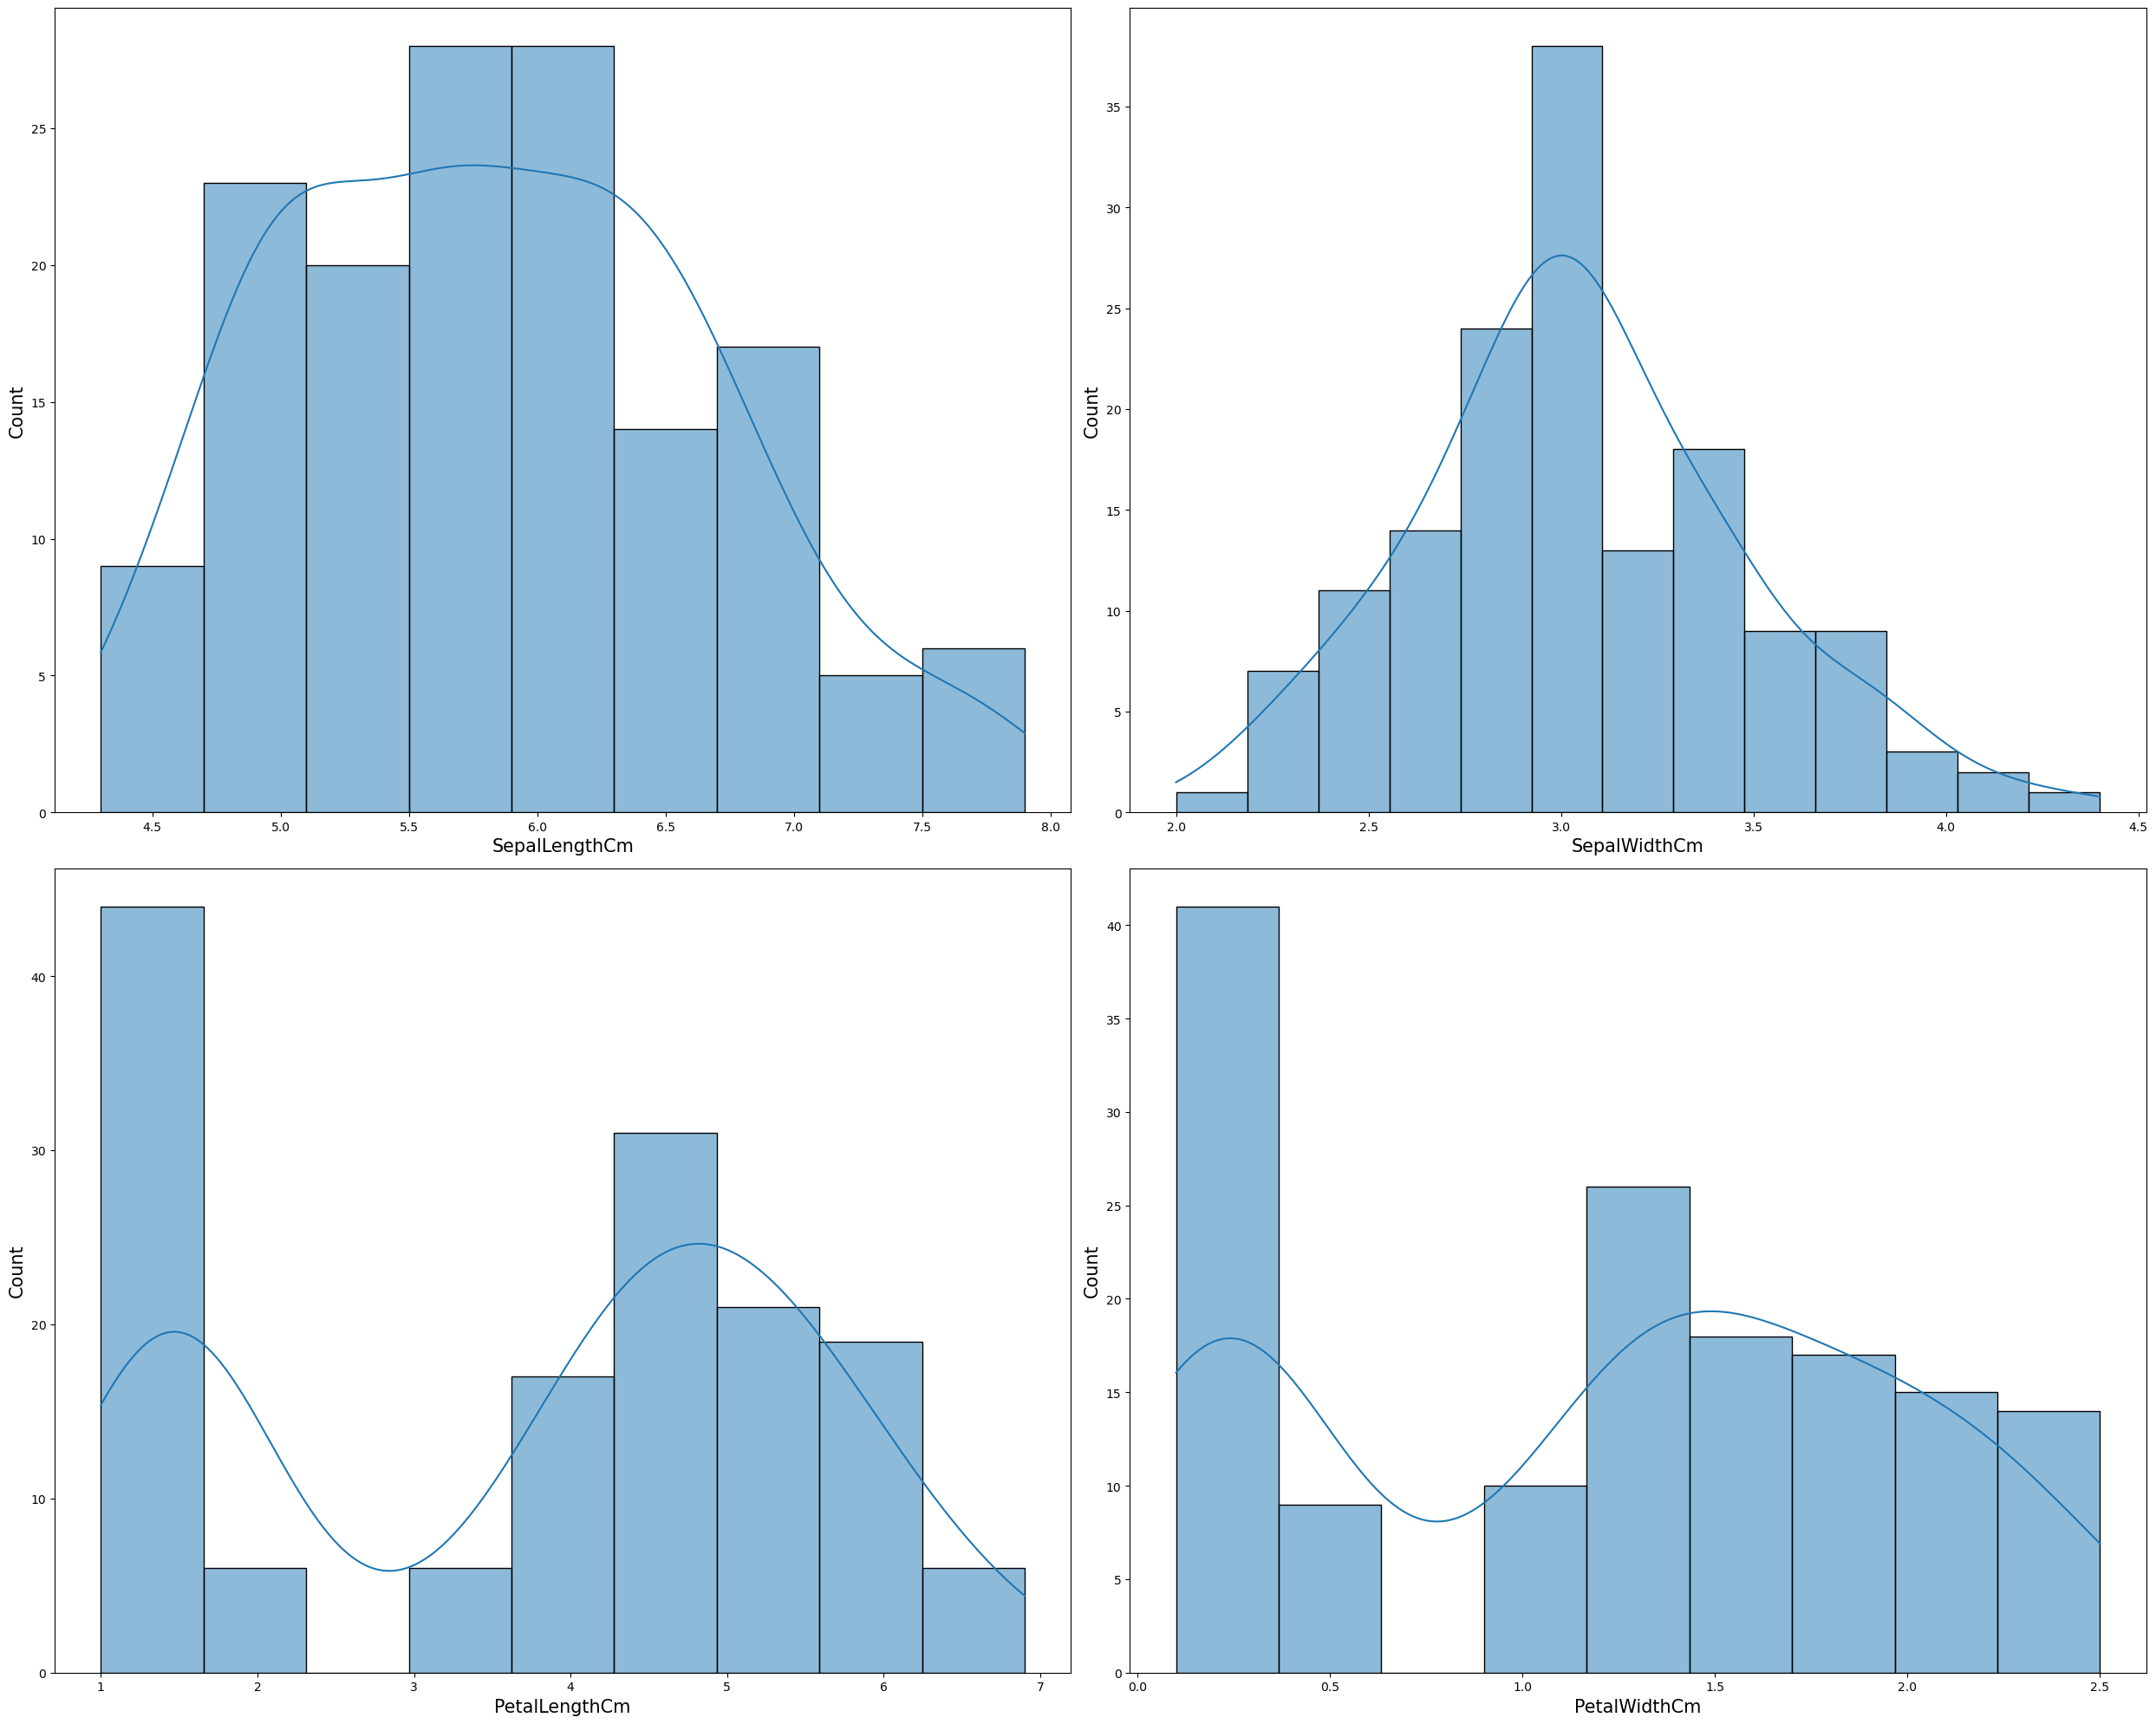

In [15]:
plt.figure(figsize=(25,20))
plotnumber = 1
for i in data.drop('Species',axis=1):
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.histplot(x=data[i],kde=True)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

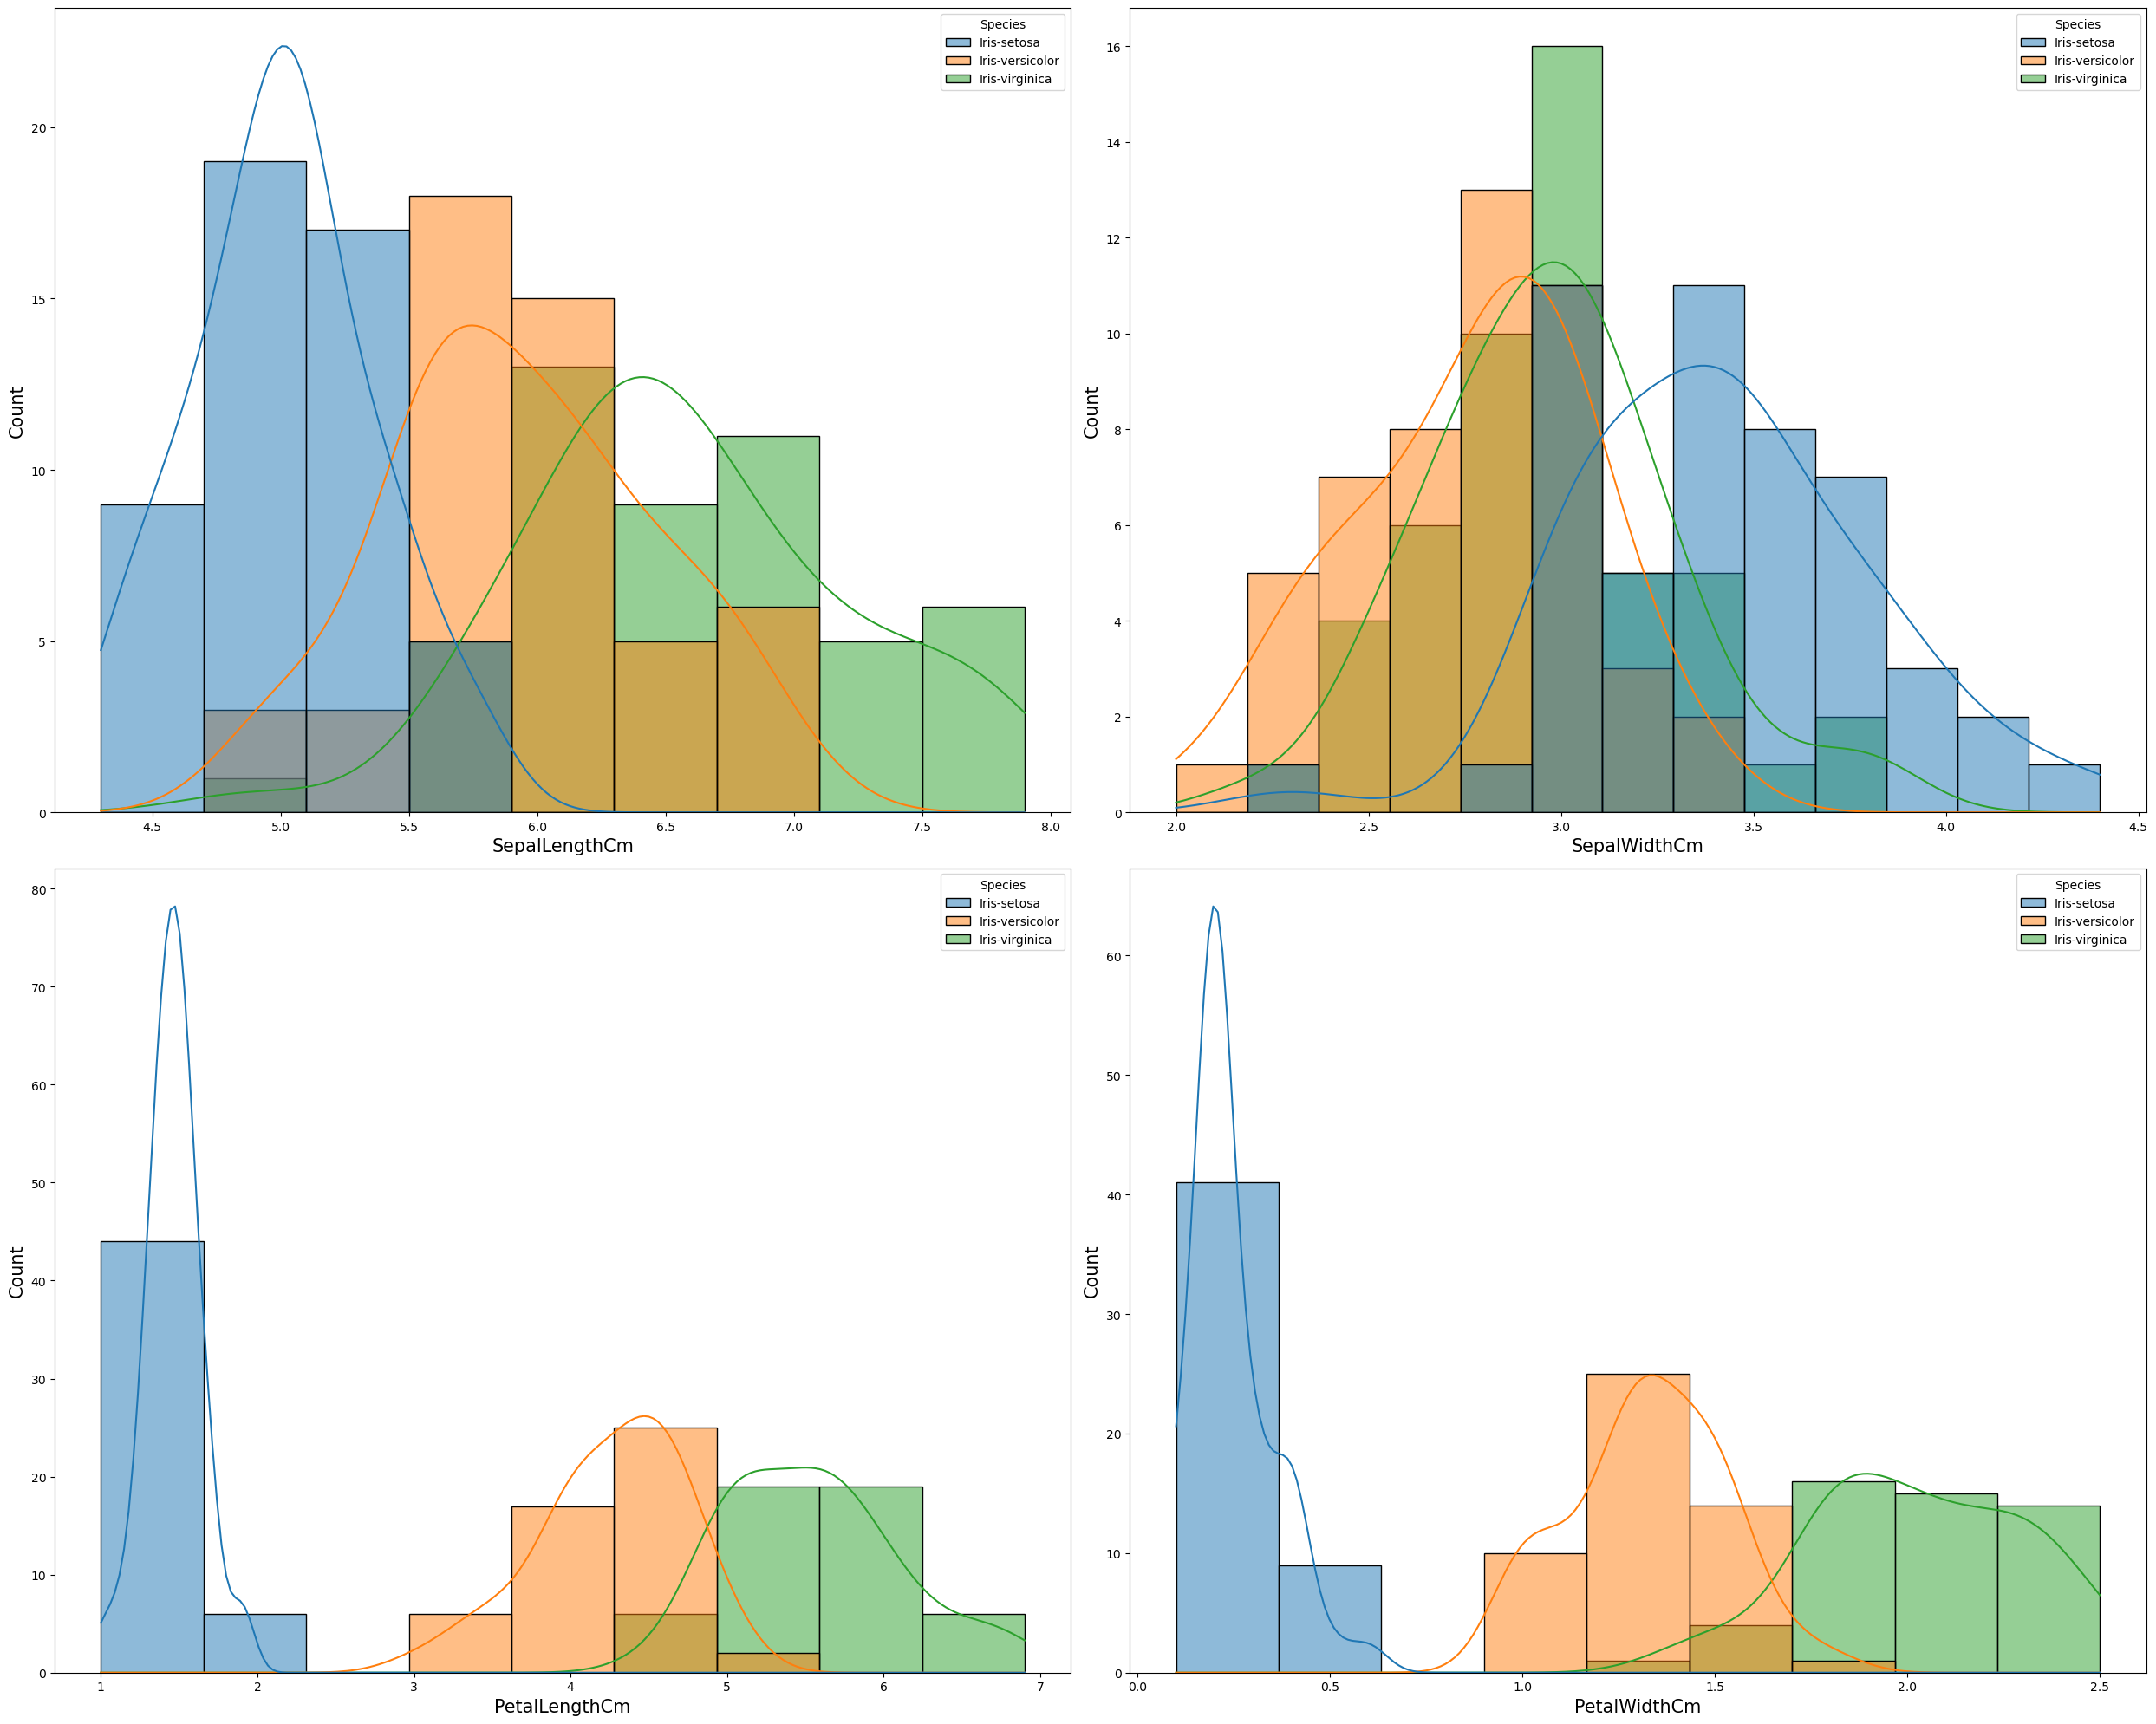

In [16]:
plt.figure(figsize=(25,20))
plotnumber = 1
for i in data.drop('Species',axis=1):
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.histplot(x=data[i],kde=True,hue=data['Species'])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [17]:
## Insights

In [18]:
## Check outliers

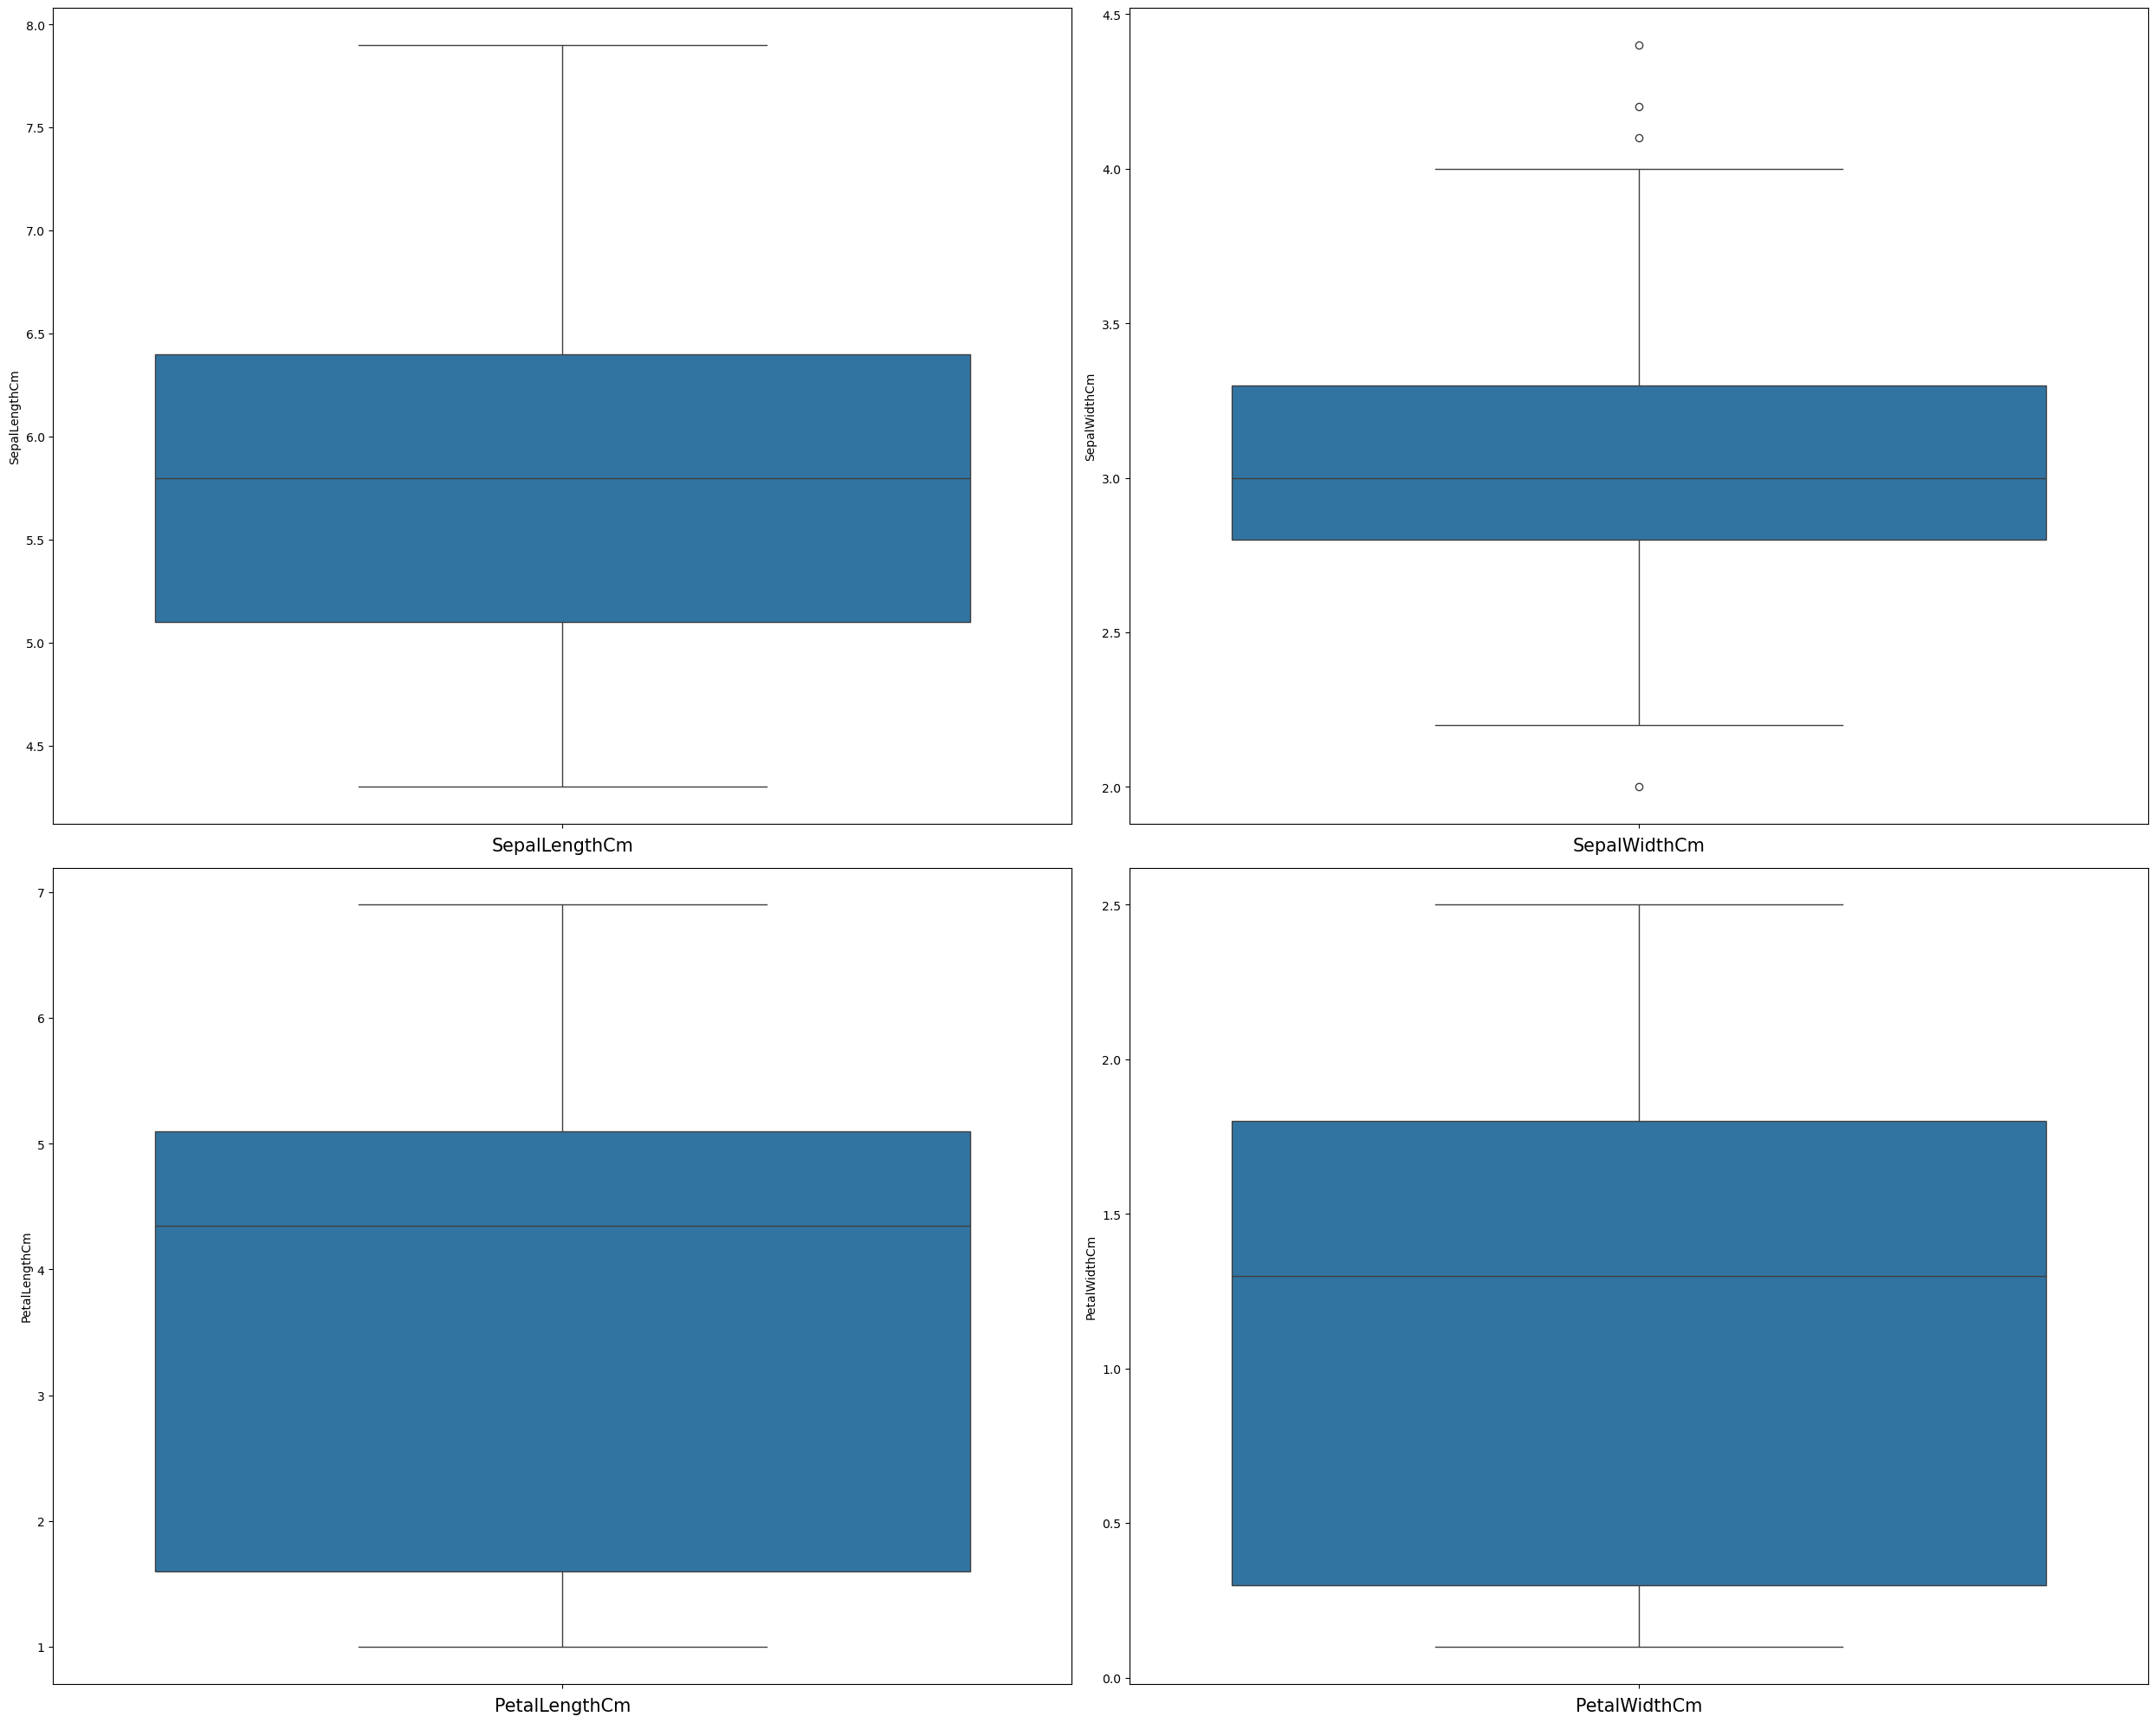

In [19]:
plt.figure(figsize=(25,20))
plotnumber = 1
for i in data:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

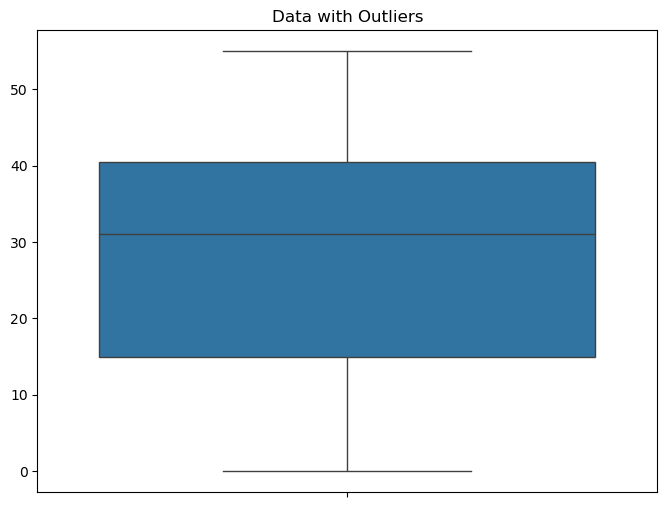

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title("Data with Outliers")
plt.show()

In [20]:
## Handling the outliers

In [21]:
## SepalWidthCm
Q3 = data['SepalWidthCm'].quantile(0.75)
Q1 = data['SepalWidthCm'].quantile(0.25)
IQR = Q3 - Q1 
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR


In [22]:
len(data.loc[data['SepalWidthCm'] > upper_limit]) / len(data) * 100   ## calculate into percentage

2.0

In [23]:
len(data.loc[data['SepalWidthCm'] < lower_limit]) / len(data) * 100 

0.6666666666666667

In [24]:
data.loc[data['SepalWidthCm'] > upper_limit,'SepalWidthCm'] = data['SepalWidthCm'].median()

In [25]:
data.loc[data['SepalWidthCm'] < lower_limit,'SepalWidthCm'] = data['SepalWidthCm'].median()

<Axes: xlabel='SepalWidthCm'>

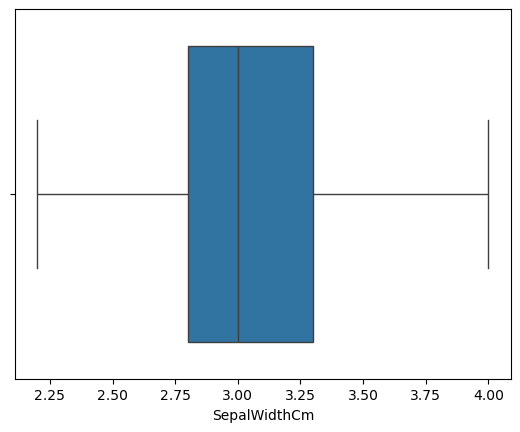

In [26]:
sns.boxplot(x=data.SepalWidthCm)

In [27]:
## leble encoding using map

In [28]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [29]:
data.Species = data.Species.map({'Iris-setosa':2,'Iris-versicolor':1,'Iris-virginica':0})

In [30]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [80]:
# Make Pair plot
sns.pairplot(data,hue= 'Species' , palette = 'Dark2', diag_kind = 'kde')
plt.show()

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

In [31]:
## Check corr-relaction

<Axes: >

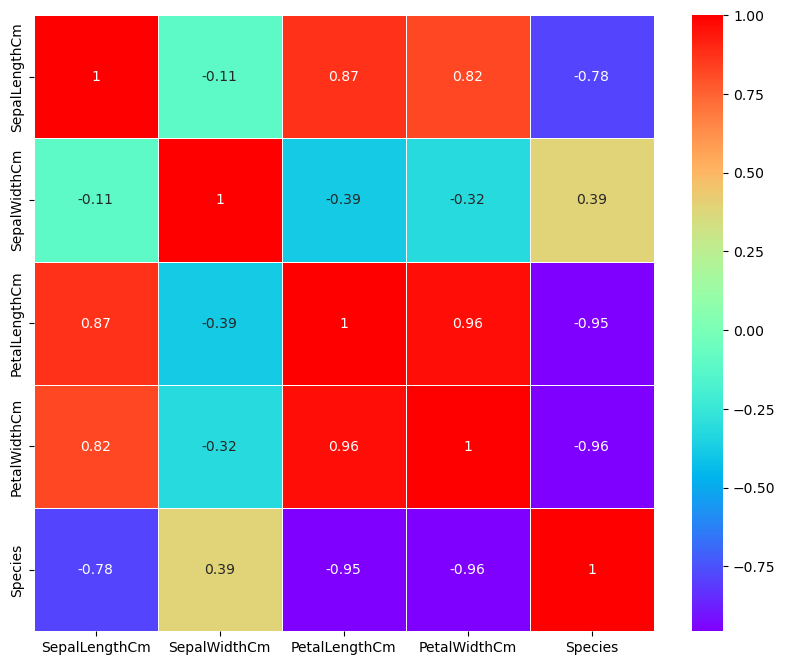

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='rainbow',linewidth=0.5)

In [33]:
## Model Creation 

In [34]:
data1 = data.copy()

In [35]:
## Scale the data

In [36]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scale.fit_transform(data1[['SepalLengthCm', 'SepalWidthCm',
                                                                                                       'PetalLengthCm', 'PetalWidthCm']])

In [37]:
## Create X and y

In [38]:
X = data1.drop('Species',axis=1)
y = data.Species

In [39]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.722222,0.067797,0.041667
1,0.166667,0.444444,0.067797,0.041667
2,0.111111,0.555556,0.050847,0.041667
3,0.083333,0.500000,0.084746,0.041667
4,0.194444,0.777778,0.067797,0.041667


In [40]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Species, dtype: int64

In [41]:
## split the data

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=14)

In [43]:
X_train.shape

(120, 4)

In [44]:
y_test.shape

(30,)

In [63]:
## SMOTE

In [67]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train,y_train)
print('Actual Value:',Counter(y_train))
print('SMOTE Value:',Counter(y_smote))

Actual Value: Counter({0: 43, 1: 41, 2: 36})
SMOTE Value: Counter({2: 43, 1: 43, 0: 43})


In [45]:
## check metrics 

In [89]:
from sklearn.metrics import accuracy_score,classification_report,recall_score

In [47]:
## Create Models

In [48]:
### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
accuracy_score(y_test,dt_pred)

0.9666666666666667

In [86]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        14

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [69]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_smote,y_smote)
lr_pred = lr.predict(X_test)
accuracy_score(lr_pred,y_test)

0.9666666666666667

In [70]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        14

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.9666666666666667

In [54]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        14

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'criterion':['gini','entropy'],
    'n_estimators':[50,100,150,200,250,300,350],
    'max_depth':(list(range(1,20))),
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':(list(range(1,20))),
    
}


rf2 = RandomForestClassifier()
rf_cv = RandomizedSearchCV(estimator = rf2, param_distributions=params, cv=3, verbose=3, scoring='accuracy')

rf_cv.fit(X_train,y_train)
best_params = rf_cv.best_params_
print(f'Best Parameters:{best_params}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END criterion=gini, max_depth=4, min_samples_leaf=19, min_samples_split=4, n_estimators=300;, score=0.925 total time=   0.8s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_leaf=19, min_samples_split=4, n_estimators=300;, score=0.800 total time=   0.6s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_leaf=19, min_samples_split=4, n_estimators=300;, score=0.950 total time=   0.5s
[CV 1/3] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.925 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.950 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.950 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=12, min_samples_leaf=15, min_samples_split=5, n_estimators=350;, score=0.900 total time=   0.6s
[CV

In [94]:
rf2 = RandomForestClassifier(n_estimators=100,
                             min_samples_split=4,
                             min_samples_leaf=1,
                             max_depth=6,
                             criterion='gini')
rf2.fit(X_train,y_train)
rf_pred2 = rf.predict(X_test)
accuracy_score(rf_pred2,y_test)

0.9666666666666667

In [71]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_smote,y_smote)
sv_pred = sv.predict(X_test)
accuracy_score(sv_pred,y_test)

1.0

In [72]:
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
accuracy_score(xgb_pred,y_test)

0.9666666666666667

In [58]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        14

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [59]:
## check cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb,X,y, cv=3, scoring='accuracy')
print(score)
print('Cross Val Score:',score.mean())
print('Std:',score.std())

[0.98 0.94 0.94]
Cross Val Score: 0.9533333333333333
Std: 0.018856180831641284


In [60]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier()
bagg.fit(X_train,y_train)
bagg_pred = bagg.predict(X_test)
accuracy_score(y_test,bagg_pred)


0.9666666666666667

In [61]:
print(classification_report(y_test,bagg_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        14

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
accuracy_score(y_test,gb_pred)

0.9666666666666667

In [87]:
print(classification_report(y_test,bagg_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        14

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

